# ElasticNet: порівняння з Ridge та Lasso

Тут я розгляну:
1. Показати ефект L1 (Lasso) та L2 (Ridge) регуляризацій
2. Показати, як ElasticNet комбінує їх переваги
3. Порівняти моделі на даних з шумом та корельованими ознаками


## 1. Підготовка даних

- Згенеруємо 10 ознак
- Перші 3 будуть значущі, решта шумові
- Деякі ознаки корельовані між собою
- Додамо шум у цільову змінну


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

np.random.seed(42)

# 1. Дані
n_samples = 50
n_features = 10

# Незалежні змінні
X_base = np.random.randn(n_samples, 5)
# Додаємо корельовані ознаки
X_corr = X_base + np.random.randn(n_samples, 5)*0.1
X = np.hstack([X_base, X_corr])  # 10 ознак всього

# Справжні коефіцієнти: перші 3 значущі, решта шум
true_coef = np.array([3, 1.5, -2] + [0]*(n_features-3))
y = X @ true_coef + np.random.randn(n_samples)*0.5  # додаємо шум


## 2. Навчання моделей
- Linear Regression
- Ridge (L2)
- Lasso (L1)
- ElasticNet (L1 + L2)


In [2]:
# Моделі
lin_model = LinearRegression().fit(X, y)
ridge_model = Ridge(alpha=1.0).fit(X, y)
lasso_model = Lasso(alpha=0.1).fit(X, y)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y)  # l1_ratio=0.5 → 50% L1 + 50% L2


## 3. Порівняння коефіцієнтів


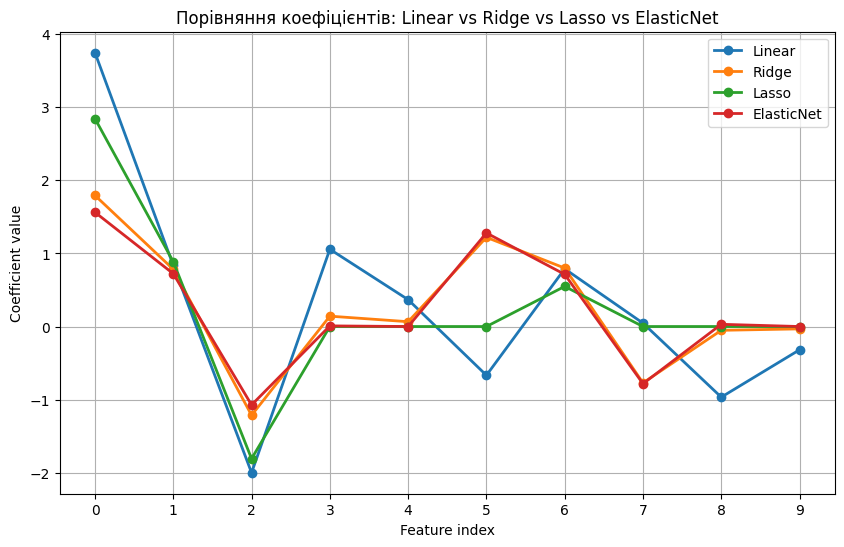

In [3]:
models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
coefs = [lin_model.coef_, ridge_model.coef_, lasso_model.coef_, elastic_model.coef_]

plt.figure(figsize=(10,6))
for i, c in enumerate(coefs):
    plt.plot(range(n_features), c, marker='o', label=models[i], linewidth=2)
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Порівняння коефіцієнтів: Linear vs Ridge vs Lasso vs ElasticNet')
plt.xticks(range(n_features))
plt.grid(True)
plt.legend()
plt.show()


## 4. Висновки

- **Linear Regression:** враховує всі ознаки, шумові також впливають
- **Ridge Regression:** стабілізує коефіцієнти, зменшує великі значення, не обнуляє
- **Lasso Regression:** обнуляє шумові ознаки, робить модель простою
- **ElasticNet:** комбінує переваги Ridge і Lasso, зберігає стабільність та обнуляє незначущі ознаки одночасно
